<a href="https://colab.research.google.com/github/Zixin-Yong/handson-ml2/blob/master/Handson_ML_CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import tensorflow.keras as keras
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization
from functools import partial 

# Fashion Mnist
fashion_mnist = keras.datasets.fashion_mnist
(X_train_full, y_train_full),(X_test, y_test) = fashion_mnist.load_data()
X_valid, X_train = X_train_full[:5000] / 255.0, X_train_full[5000:] / 255.0
y_valid, y_train = y_train_full[:5000], y_train_full[5000:]
class_names = ["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat",
"Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"]

X_train = X_train.reshape((X_train.shape[0], 28, 28, 1))
X_valid = X_valid.reshape((X_valid.shape[0], 28, 28, 1))
X_test = X_test.reshape((X_test.shape[0], 28, 28, 1))



In [15]:
import tensorflow as tf
print(tf.__version__)
print(tf.test.gpu_device_name())
!/opt/bin/nvidia-smi

1.15.0
/device:GPU:0
Fri Feb  7 15:28:06 2020       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 418.67       Driver Version: 418.67       CUDA Version: 10.1     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   70C    P0    29W /  70W |   2659MiB / 15079MiB |      0%      Default |
+-------------------------------+----------------------+----------------------+
                                                                               
+-----------------------------------------------------------------------------+
| Processes:                                                       

In [10]:
DefaulConv2D = partial(Conv2D, kernel_size=3, activation='relu', padding='same')

model = keras.models.Sequential([
    DefaulConv2D(filters=64, kernel_size=7, input_shape=[28,28,1]),
    MaxPooling2D(pool_size=2),
    DefaulConv2D(filters=128),
    DefaulConv2D(filters=128),
    MaxPooling2D(pool_size=2),
    DefaulConv2D(filters=256),
    DefaulConv2D(filters=256), #to make 1 million parameters
    MaxPooling2D(pool_size=2),
    Flatten(),
    Dense(units=128, activation='relu'),
    Dropout(0.5),
    Dense(units=64, activation='relu'),
    Dropout(0.5),
    Dense(units=10, activation='softmax')
])

model.summary() 

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_10 (Conv2D)           (None, 28, 28, 64)        3200      
_________________________________________________________________
batch_normalization (BatchNo (None, 28, 28, 64)        256       
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 14, 14, 64)        0         
_________________________________________________________________
conv2d_11 (Conv2D)           (None, 14, 14, 128)       73856     
_________________________________________________________________
batch_normalization_1 (Batch (None, 14, 14, 128)       512       
_________________________________________________________________
conv2d_12 (Conv2D)           (None, 14, 14, 128)       147584    
_________________________________________________________________
batch_normalization_2 (Batch (None, 14, 14, 128)      

Train on 55000 samples, validate on 5000 samples
Epoch 1/10
55000/55000 [==============================] - 18s 334us/sample - loss: 0.2363 - acc: 0.9201 - val_loss: 0.2371 - val_acc: 0.9200
Epoch 2/10
55000/55000 [==============================] - 19s 340us/sample - loss: 0.2222 - acc: 0.9248 - val_loss: 0.2616 - val_acc: 0.9138
Epoch 3/10
55000/55000 [==============================] - 18s 334us/sample - loss: 0.1988 - acc: 0.9315 - val_loss: 0.3292 - val_acc: 0.8816
Epoch 4/10
55000/55000 [==============================] - 18s 333us/sample - loss: 0.1856 - acc: 0.9381 - val_loss: 0.2947 - val_acc: 0.8914
Epoch 5/10
55000/55000 [==============================] - 18s 332us/sample - loss: 0.1724 - acc: 0.9423 - val_loss: 0.2405 - val_acc: 0.9172
Epoch 6/10
55000/55000 [==============================] - 18s 333us/sample - loss: 0.1561 - acc: 0.9472 - val_loss: 0.2816 - val_acc: 0.9164
Epoch 7/10
55000/55000 [==============================] - 18s 332us/sample - loss: 0.1451 - acc: 0.9508 -

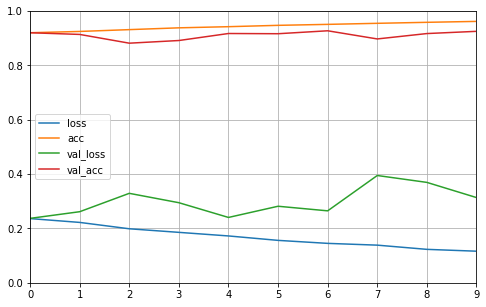

In [13]:
#model.compile(loss='sparse_categorical_crossentropy', optimizer='nadam', metrics=["accuracy"])
history = model.fit(X_train, y_train, batch_size=32, epochs=10, validation_data=(X_valid, y_valid))

import pandas as pd
import matplotlib.pyplot as plt
pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1) # set the vertical range to [0-1]
plt.show()

In [14]:
print('\n# Evaluate on test data')
results = model.evaluate(X_test, y_test, batch_size=128, verbose=0)
print('test loss, test acc:', results)


# Evaluate on test data
test loss, test acc: [53.52675024414062, 0.8167]
